## Visualizing the Model data:

In [48]:
import numpy as np
import pandas as pd
import csv
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

### 1. Import the data and merge the same for ease of operation:

In [2]:
wind_actual = pd.read_csv('final_actual.csv')
wind_forecast = pd.read_csv('final_forecast.csv')

In [24]:
input_data = pd.merge(wind_forecast,wind_actual, on=['Date','HE'])

In [25]:
input_data=input_data.set_index('Date')

In [26]:
input_data.rename(columns={'MW_x':'MW_forecast','MW_y':'MW_actual'}, inplace=True)

In [27]:
input_data = input_data[['HE','Area','MW_forecast','MW_actual']]
input_data

,HE,Area,MW_forecast,MW_actual
Date,,,,
1/1/23,1,RTO,5898.113443,6117.732
1/1/23,2,RTO,6056.121206,6556.513
1/1/23,3,RTO,5191.992898,5901.861
1/1/23,4,RTO,4851.371052,5294.705
1/1/23,5,RTO,5371.115128,4776.355
...,...,...,...,...
4/20/24,20,RTO,4690.841000,0.000
4/20/24,21,RTO,3941.860000,0.000
4/20/24,22,RTO,3257.461000,0.000


### 2. Exploratory data Analysis
### 2.a. Describe the data:

In [34]:
input_data.describe()

,HE,MW_forecast,MW_actual
count,11279.000000,11279.000000,11279.000000
mean,12.512191,3350.949984,3593.757474
std,6.928844,2376.119198,2407.040008
min,1.000000,-2524.223670,0.000000
25%,7.000000,1466.525914,1601.852500
50%,13.000000,2992.543000,3130.379000
75%,19.000000,5027.175391,5301.542500
max,24.000000,10387.065660,9993.227000


### 2.b. Check for Null values

In [35]:
input_data.isnull().sum()

HE             0
Area           0
MW_forecast    0
MW_actual      0
dtype: int64

### 2.c. Plot the forecast data in 3 different plots

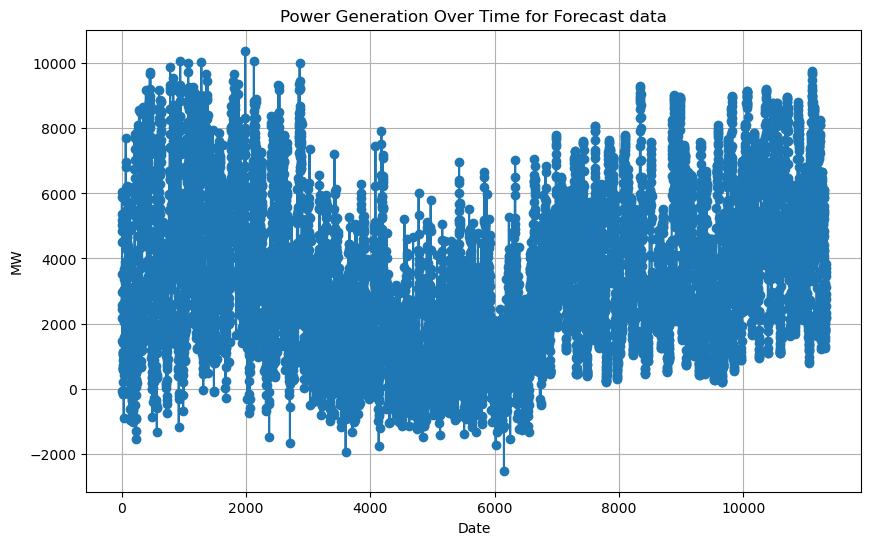

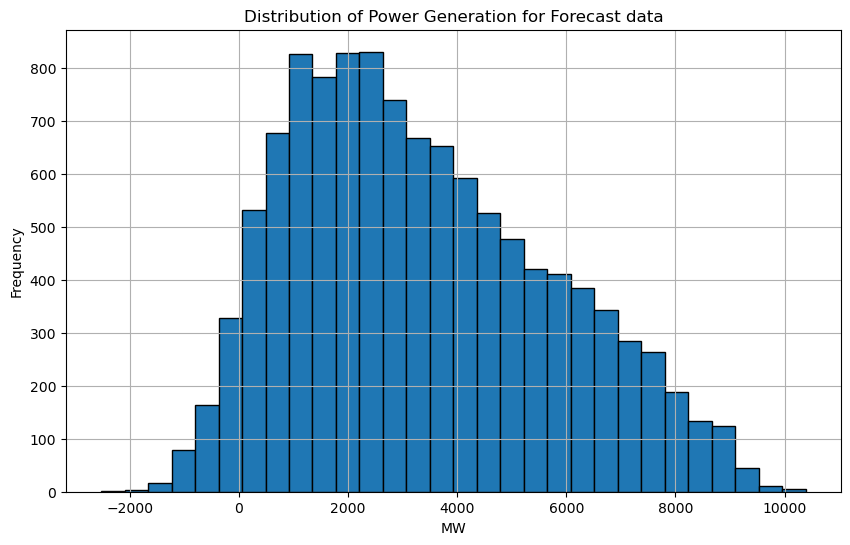

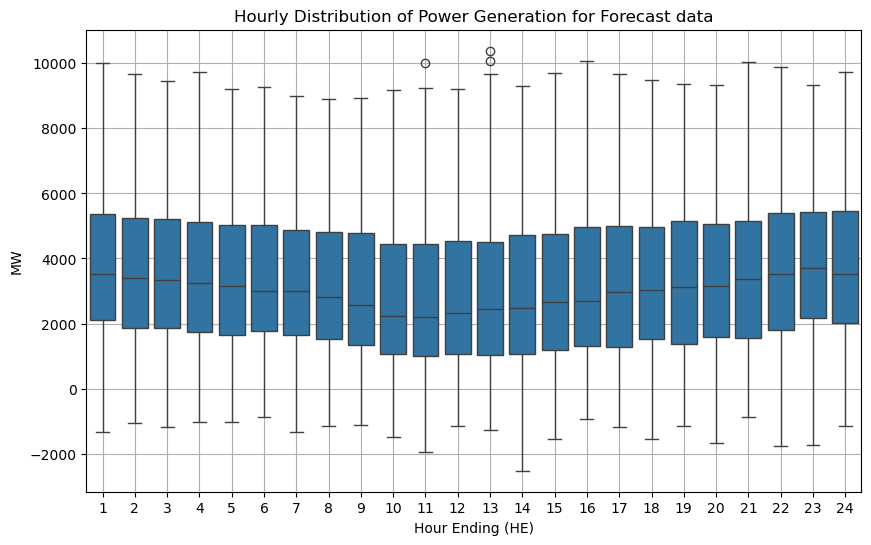

In [30]:

plt.figure(figsize=(10, 6))
plt.plot(wind_forecast.index, wind_forecast['MW'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('Power Generation Over Time for Forecast data')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(wind_forecast['MW'], bins=30, edgecolor='black')
plt.xlabel('MW')
plt.ylabel('Frequency')
plt.title('Distribution of Power Generation for Forecast data')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='HE', y='MW', data=wind_forecast)
plt.xlabel('Hour Ending (HE)')
plt.ylabel('MW')
plt.title('Hourly Distribution of Power Generation for Forecast data')
plt.grid(True)
plt.show()


### 2.d Plot the Actual data in 3 different plots

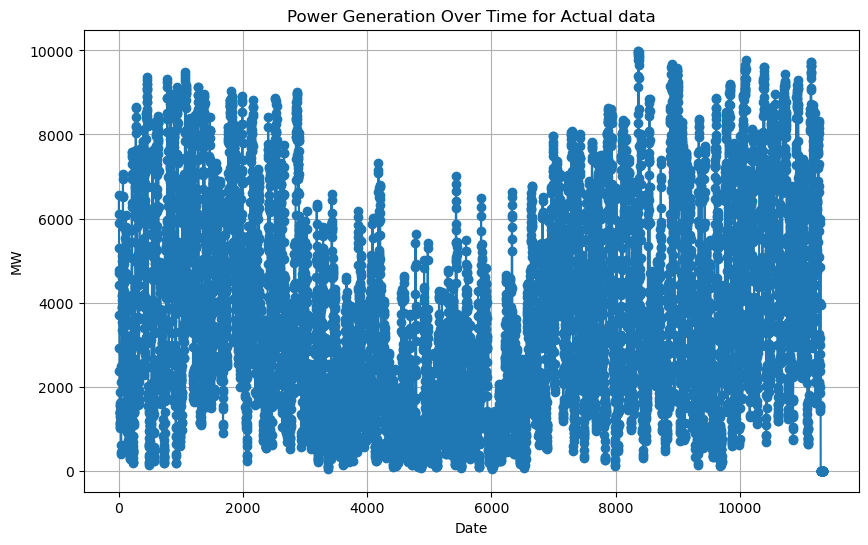

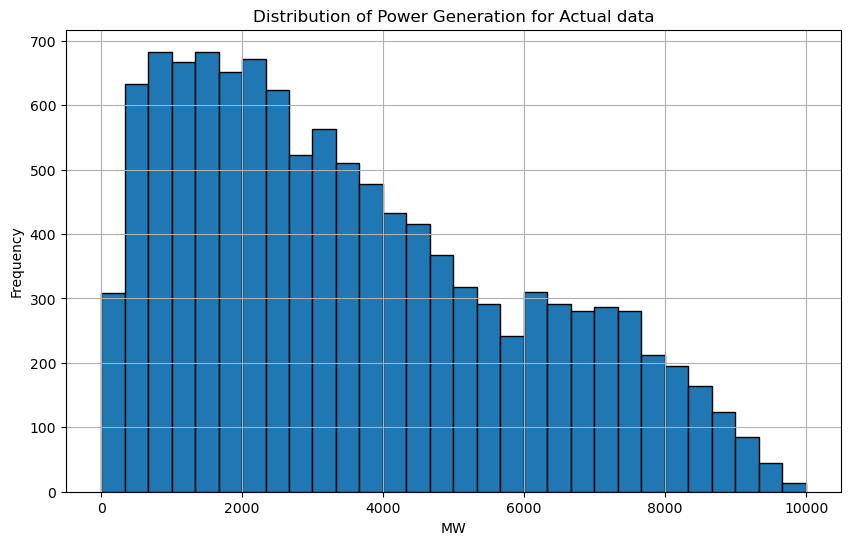

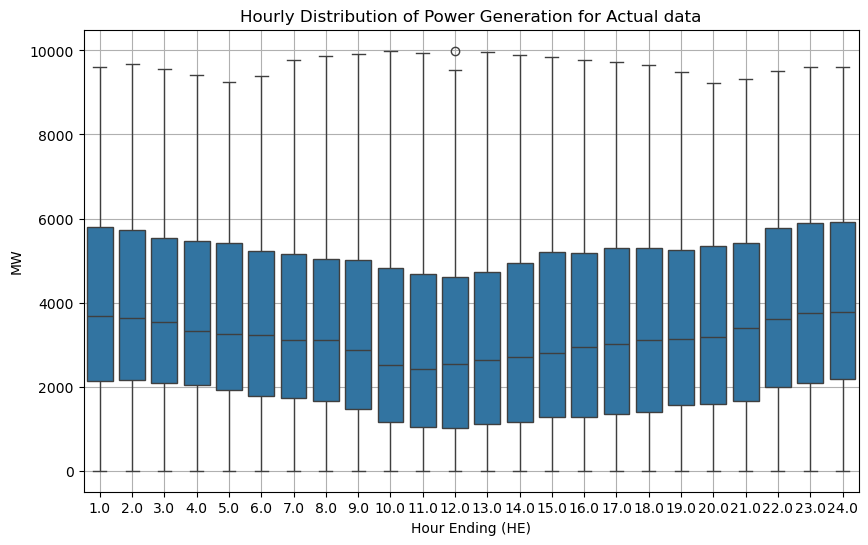

In [31]:

# Line plot of power generation over time
plt.figure(figsize=(10, 6))
plt.plot(wind_actual.index, wind_actual['MW'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('Power Generation Over Time for Actual data')
plt.grid(True)
plt.show()

# Histogram of power generation
plt.figure(figsize=(10, 6))
plt.hist(wind_actual['MW'], bins=30, edgecolor='black')
plt.xlabel('MW')
plt.ylabel('Frequency')
plt.title('Distribution of Power Generation for Actual data')
plt.grid(True)
plt.show()

# Box plot of power generation by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='HE', y='MW', data=wind_actual)
plt.xlabel('Hour Ending (HE)')
plt.ylabel('MW')
plt.title('Hourly Distribution of Power Generation for Actual data')
plt.grid(True)
plt.show()


### 2.e. Analyse the box plots of the Forecast and actual data

### Forecast data Box Plot

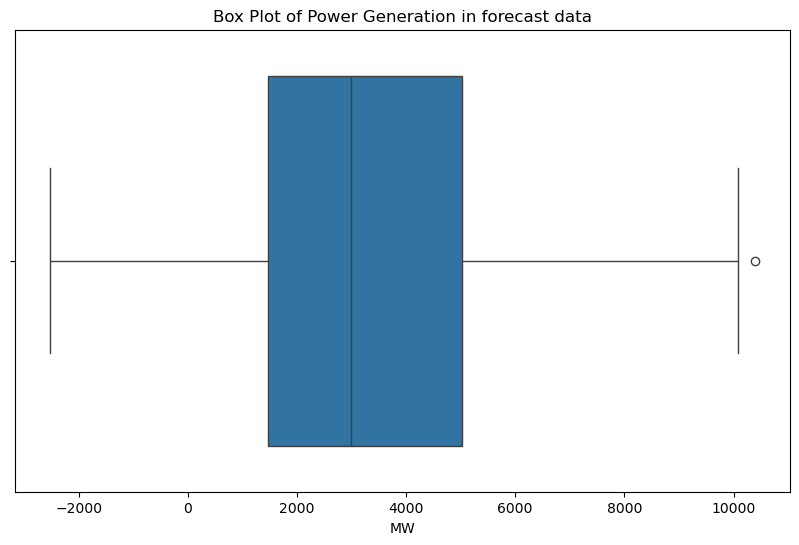

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MW', data=wind_forecast)
plt.xlabel('MW')
plt.title('Box Plot of Power Generation in forecast data')
plt.show()

- We see we have one outlier point in the data.

### Analyzing the outliers:

In [45]:
print("Highest allowed",wind_forecast['MW'].mean() + 3*wind_forecast['MW'].std())
print("Lowest allowed",wind_forecast['MW'].mean() - 3*wind_forecast['MW'].std())

Highest allowed 10468.487963739379
Lowest allowed -3775.1017931224965


In [46]:
input_data['MW_forecast'].min()

-2524.22367

- Therefore, the outlier can be accepted.

### Actual data Box plot

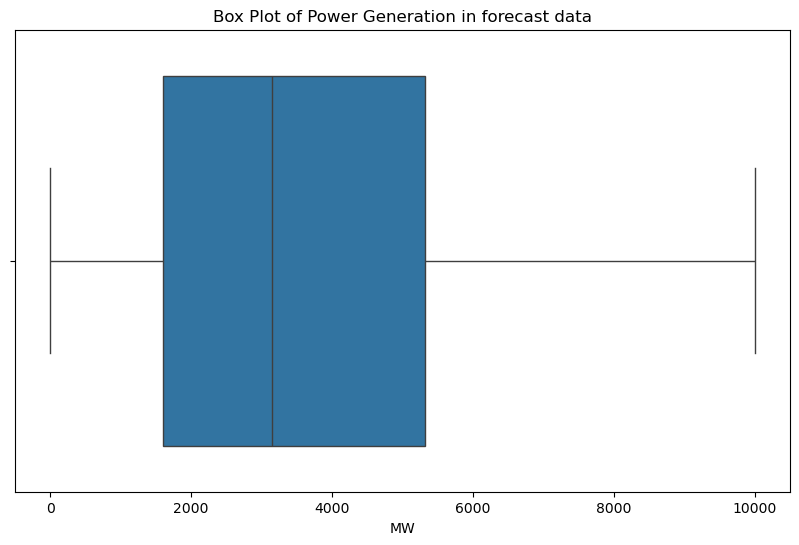

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MW', data=wind_actual)
plt.xlabel('MW')
plt.title('Box Plot of Power Generation in forecast data')
plt.show()

### 2.f. Correlation analysis of the actual and forecasted values

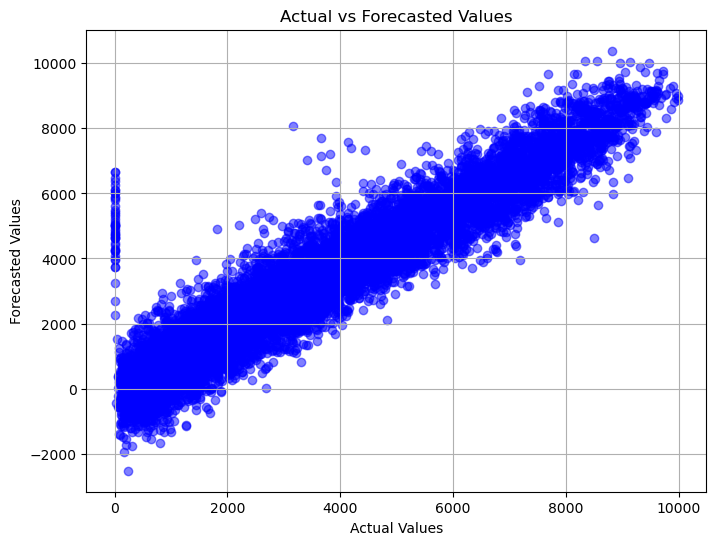

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(input_data['MW_actual'], input_data['MW_forecast'], color='blue', alpha=0.5)
plt.title('Actual vs Forecasted Values')
plt.xlabel('Actual Values')
plt.ylabel('Forecasted Values')
plt.grid(True)
plt.show()

- We see a very strong positive correlation between the actual and forecasted values

### 2.e. Analysing the seasonal decomposition of the Actual data:

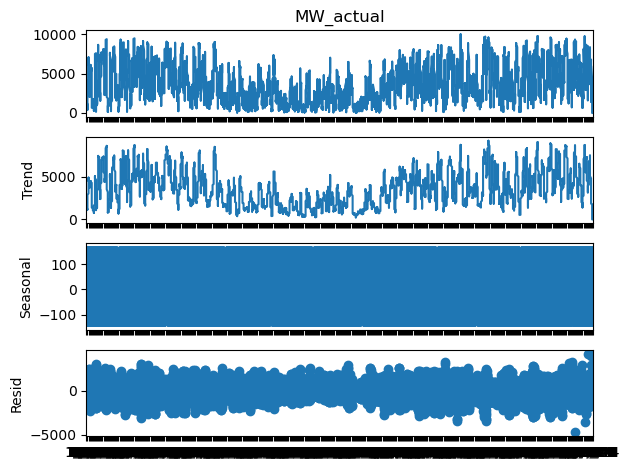

In [49]:
decomposition = seasonal_decompose(input_data['MW_actual'], model='additive', period=24)
fig = decomposition.plot()
plt.show()

### Analysing the seasonal decomposition of the Forecast data:

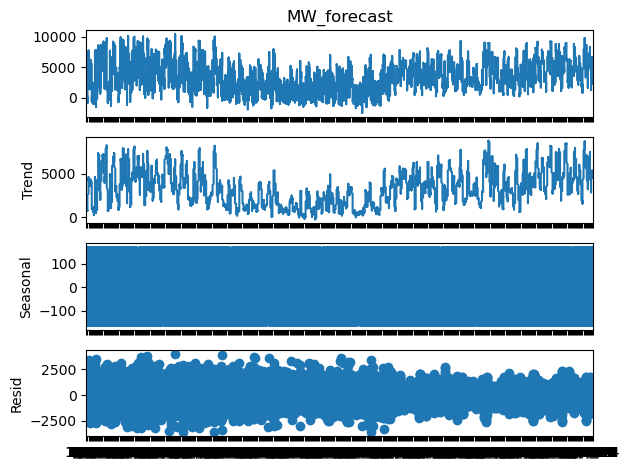

In [50]:
decomposition = seasonal_decompose(input_data['MW_forecast'], model='additive', period=24)
fig = decomposition.plot()
plt.show()

### ***FIN.***